### Code Dependencies

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


### Log


Any mention of **log** below will always be referring to the **natural logarithm**. 

The natural log represents the solution for $\large x$ in the equation $\large e^x = b$ 

For example, $\large e^x = 5.2$ is solved by $\large log(5.2)$

In [33]:
np.log(5.2)

1.6486586255873816

In [4]:
math.e ** 1.6486586255873816

5.199999999999999

Let's plot these functions to get a feel for them.

#### Plot Exponential Function

Remember, that the exponential function is especially suitable for neural networks, being that $y={c}{e}^x, c ∈ R$  is the only class of functions whose derivative is itself. 

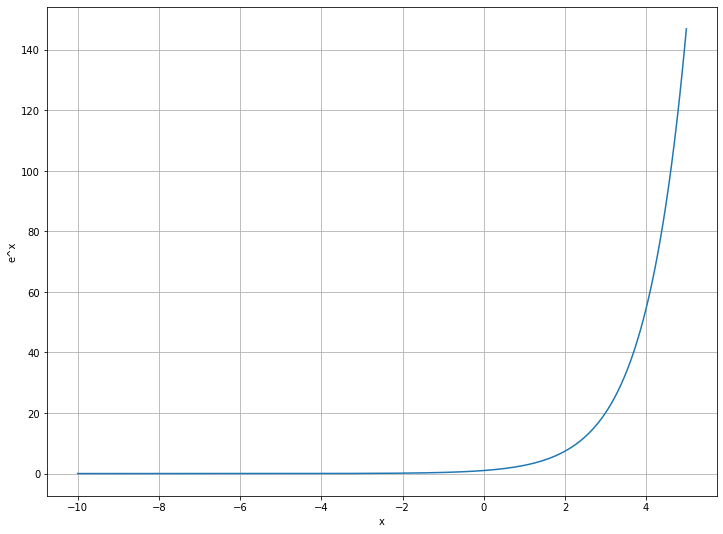

In [5]:
xs = np.arange(-10, 5, .01) 
ys = [math.exp(x) for x in xs]

plt.plot(xs, ys)

plt.xlabel('x')
plt.ylabel('e^x')

plt.grid(axis = 'both')
plt.show()

#### Plot Log

Note, logarithms are not defined (in the real numbers) for numbers <= 0, being that there are no solutions for $\large x$ in $\large e^x <= 0$ 

In [6]:
math.log(-1)

ValueError: ignored

In [8]:
math.log(0)

ValueError: ignored

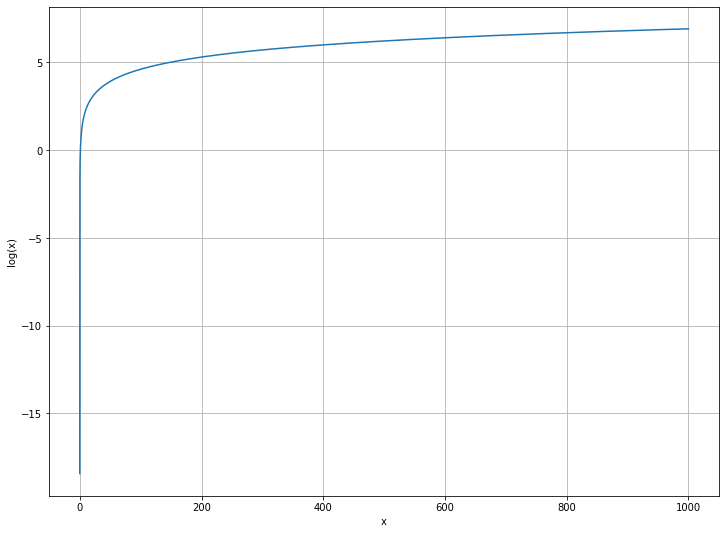

In [9]:
xs = np.arange(0.00000001, 1000, .01) 
ys = [math.log(x) for x in xs]

plt.plot(xs, ys)

plt.xlabel('x')
plt.ylabel('log(x)')

plt.grid(axis = 'both')
plt.show()

**Let's zoom in a bit**

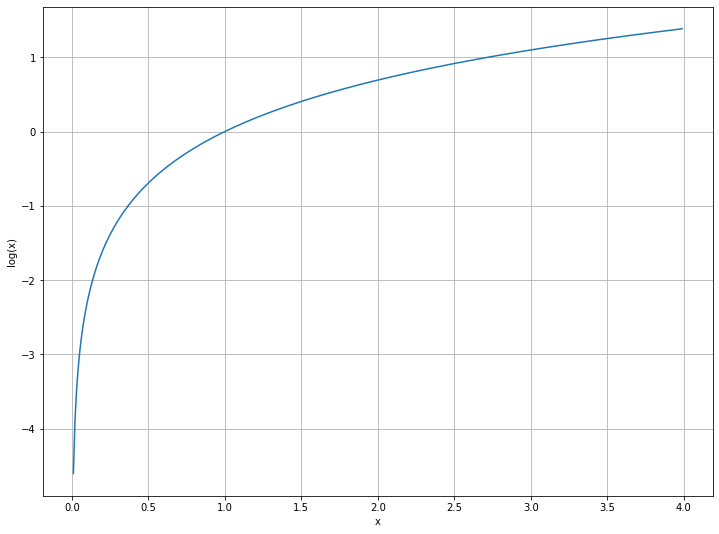

In [10]:
xs = np.arange(0.01, 4, .01) 
ys = [math.log(x) for x in xs]

plt.plot(xs, ys)

plt.xlabel('x')
plt.ylabel('log(x)')

plt.grid(axis = 'both')
plt.show()

#### Plot -Log

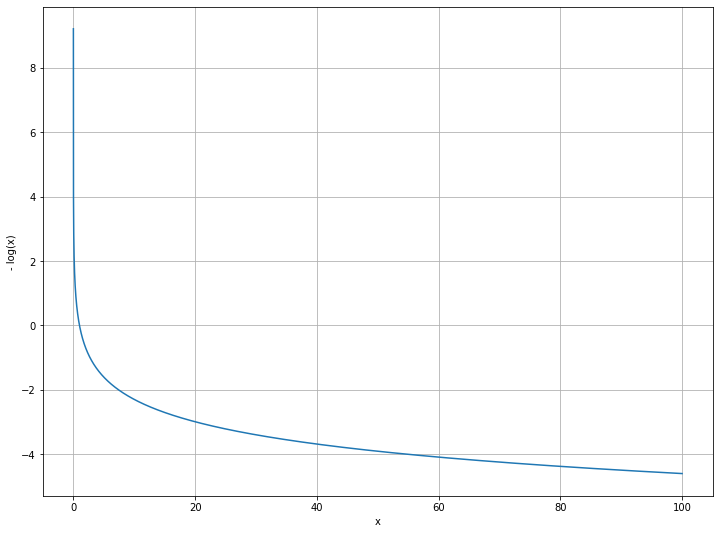

In [11]:
xs = np.arange(0.0001, 100, .0001) 
ys = [-math.log(x) for x in xs]

plt.plot(xs, ys)

plt.xlabel('x')
plt.ylabel('- log(x)')

plt.grid(axis = 'both')
plt.show()

**Let's stop inputs at $\large 1$ (we'll see why soon)**

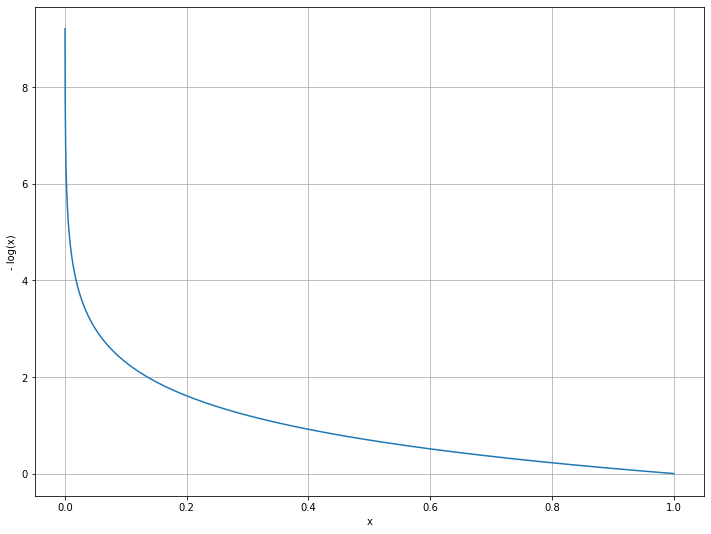

In [12]:
xs = np.arange(0.0001, 1, .0001) 
ys = [-math.log(x) for x in xs]

plt.plot(xs, ys)

plt.xlabel('x')
plt.ylabel('- log(x)')

plt.grid(axis = 'both')
plt.show()

### Our Loss Function Goal

It's time to setup our **loss function**.

<br>

The output of our network is confidence scores (a probability distribution) produced by our Softmax layer - hence more confidence in the correct answer is better. 

We want to:
- **increase correct confidence**
- **decrease misplaced confidence**

### Cross-entropy Loss

Let's jump right in.

**Cross-entropy** compares the “ground-truth” probability (y or “targets”) and some predicted distribution (y-hat or
“predictions”)



![](https://drive.google.com/uc?id=1qhlJBbRf_oARGJUWPWEgvJpeBnnCfW9b)

![](https://drive.google.com/uc?id=1acZN9XoSlQL5AbGE14K3P90Z7xTkNSd7)

Don't be intimidated by the formula; it's really straightforward:
- multiply each $\large y$ with the natural log of $\large \hat{y}$ 
- get the negative of their sum

In [13]:
ys = [1, 0, 0]
y_hats = [0.7, 0.1, 0.2]

loss = - np.array(
    [y * math.log(y_hat) for y, y_hat in zip(ys, y_hats)]
).sum()    

print(loss)

0.35667494393873245


### Categorical Cross-entropy Loss

While we could use the above Cross-Entropy formula, it is really meant for handling cases where both the targets and the predictions are probability distributions, such as:

![](https://drive.google.com/uc?id=1dQmb1HOeXcS5Pn3eQm6hbhy0NYvncGh9)



However, when comparing the model’s results to a one-hot vector (as in our case), the formula can really be simplified. 

Notice, how we are multiplying each $\large y$ with the natural log of $\large \hat{y}$, yet; $\large y$ is either $\large 0$ (in which case it zeros out and can be ignored) or it's $\large 1$ (in which case we don't need it for the multiplication). 

<br>

---

**So ...** 

![](https://drive.google.com/uc?id=1qhlJBbRf_oARGJUWPWEgvJpeBnnCfW9b)


![](https://drive.google.com/uc?id=1acZN9XoSlQL5AbGE14K3P90Z7xTkNSd7)

**... can be simplified to:**

![](https://drive.google.com/uc?id=1Y0wCm90FkvXUrpROnzjix85uXSdVEKJA)

![](https://drive.google.com/uc?id=1dqOeJxvng_R6f_GIiucIxgb5DV7AisgZ)


This special case of the cross-entropy calculation is called **categorical cross-entropy**. 

In [14]:
true_class_idx = 0
y_hats = [0.7, 0.1, 0.2]

loss = - math.log(y_hats[true_class_idx])      

print(loss)

0.35667494393873245


Looking at the simple formula above, we can now see why it's also called **log loss**.

### Plot it


#### Quick peek

The Categorical Cross-Entropy Loss is cool: it returns **larger loss** for **lower confidence**:

In [15]:
confidence_scores = [
    1.,
    0.95,
    0.9,
    0.8,
    0.7,
    0.6,
    0.5,
    0.4,
    0.3,
    0.2,
    0.1,
    0.05,
    0.01,
    0.001,
    0.00001,
    0.00000001,
]

for confidence in confidence_scores:
      print(f'{confidence} : {-math.log(confidence):.3f}')



1.0 : -0.000
0.95 : 0.051
0.9 : 0.105
0.8 : 0.223
0.7 : 0.357
0.6 : 0.511
0.5 : 0.693
0.4 : 0.916
0.3 : 1.204
0.2 : 1.609
0.1 : 2.303
0.05 : 2.996
0.01 : 4.605
0.001 : 6.908
1e-05 : 11.513
1e-08 : 18.421


#### Plot

This is the exact same $\large - log$ plot we showed above.

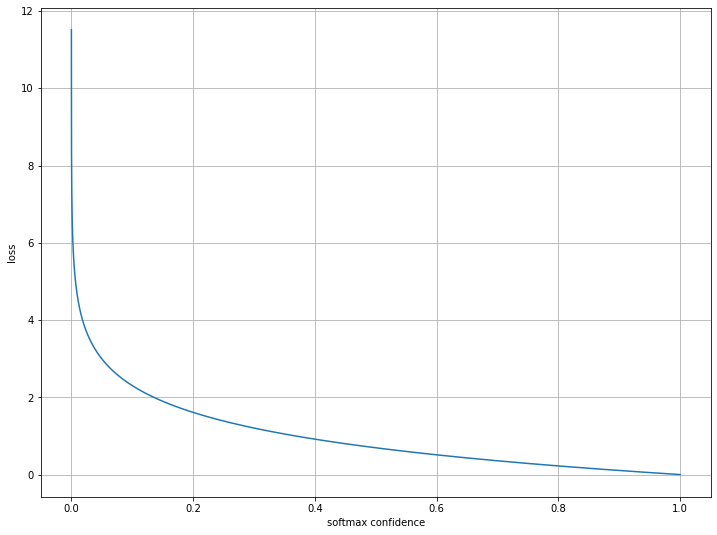

In [16]:
softmax_values = np.arange(.00001, 1, .00001) 
loss = [-math.log(val) for val in softmax_values]

plt.plot(softmax_values, loss)

plt.xlabel('softmax confidence')
plt.ylabel('loss')

plt.grid(axis = 'both')
plt.show()

### Handling input of 0

As mentioned above, logarithms are not defined for numbers <= 0.

What if the input into our $- log$ function is $0$?

In other words, although we won't expect negative confidence levels (not possible), we should be able to handle a confidence input of $0$. 

#### Its Limit

The limit of $log(x)$, as $x$ approaches $0$ from the right, is $- \infty$.

$\large \lim_{x\to 0+} log(x) = -\infty$

<br>

By the same token:

$\large \lim_{x\to-\infty} e^x = 0$

<br>

See plots above to bring this to light.

#### Inadvisable Solution


A simplistic approach: add a very small value to all the confidence scores to prevent it from being a zero.

This, however, is not a good approach. Imagine the model is fully correct in a prediction and puts all the confidence in the correct label - i.e. it gives it a confidence of $1$.

$\large - log(1) = 0$ which is a good loss. 




In [17]:
- np.log(1)

-0.0

However, look what happens when add a small number to it 

In [18]:
loss = - np.log(1 + 1e-7)

print(f'loss: {loss:.8f}')

loss: -0.00000010


The loss is now negative! 

> See $-log$ plot above for more intuition.

A negative loss shouldn't be possible.

In short, this solution is not good; we can't allow inputs into our **Negative Log Loss** function greater than 1.

The other small problem here is shifting confidence towards 1, even if by a very small value. 

#### Good Solution


To prevent both issues, it’s better to clip values from both sides by the same number, 1e-7 in our case.

That means that the lowest possible value will become 1e-7 and the highest possible value will become 1-1e-7.

---

Here's how clip works:
- Any value < 1e-7 will become 1e-7 
- Any value > 1-1e-7 will become 1-1e-7

In [19]:
softmax_outputs = [0, 1e-7, 0.2, 0.3, .9, 1 - 1e-7, 1]

clipped = np.clip(
    softmax_outputs, 
    1e-7, 
    1 - 1e-7
)

In [20]:
for orig, clip in zip(softmax_outputs, clipped):
    print(f'orginal value: {orig:.8f}, clipped value: {clip:.8f}')

orginal value: 0.00000000, clipped value: 0.00000010
orginal value: 0.00000010, clipped value: 0.00000010
orginal value: 0.20000000, clipped value: 0.20000000
orginal value: 0.30000000, clipped value: 0.30000000
orginal value: 0.90000000, clipped value: 0.90000000
orginal value: 0.99999990, clipped value: 0.99999990
orginal value: 1.00000000, clipped value: 0.99999990


### Example with Batch (optional)

> Note: you only need to review this section if you have trouble reviewing the neural network code (next notebook). 

#### Setup

In [21]:
softmax_outputs = np.array(
    [
        [0.7, 0.1, 0.2],
        [0.1, 0.5, 0.4],
        [0.02, 0.9, 0.08]
    ]
)

class_targets = [0, 1, 1]


#### Multidimensional Filter

In [22]:
softmax_outputs.shape

(3, 3)

In [23]:
dim_0_filter = [0, 1, 2]


In [24]:
softmax_outputs[dim_0_filter]

array([[0.7 , 0.1 , 0.2 ],
       [0.1 , 0.5 , 0.4 ],
       [0.02, 0.9 , 0.08]])

In [25]:
dim_1_filter = class_targets

softmax_outputs[dim_0_filter, dim_1_filter]

array([0.7, 0.5, 0.9])

**Even Better:**

In [26]:
softmax_outputs[
    range(len(softmax_outputs)), 
    class_targets
]

array([0.7, 0.5, 0.9])

#### Negative Log Loss

In [27]:
-np.log(
    softmax_outputs[
        range(len(softmax_outputs)), 
        class_targets
    ]
)

array([0.35667494, 0.69314718, 0.10536052])

#### Avg Loss per Batch

In [28]:
-np.log(
    softmax_outputs[
        range(len(softmax_outputs)), 
        class_targets
    ]
).mean()

0.38506088005216804

#### Variation when one-hot encoded

Let's add a check if `class_targets` are one-hot encoded and handle it a bit differently.

In [29]:
softmax_outputs = np.array(
    [
        [0.7, 0.1, 0.2],
        [0.1, 0.5, 0.4],
        [0.02, 0.9, 0.08]
    ]
)

class_targets = np.array(
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0]
    ]
)

**Note what happens when we multiply the two:** 

In [30]:
softmax_outputs * class_targets

array([[0.7, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0.9, 0. ]])

**What our `if` will look like:**

In [31]:
if len(class_targets.shape) == 1:
    correct_confidences = softmax_outputs[
        range(len(softmax_outputs)),
        class_targets
    ]
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(
        softmax_outputs*class_targets,
        axis=1
    )

In [32]:
neg_log = -np.log(correct_confidences)

average_loss = np.mean(neg_log)

average_loss

0.38506088005216804